In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer

In [2]:
jan_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
feb_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

In [22]:
jan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3009173 entries, 0 to 3066765
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           object        
 8   DOLocationID           object        
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [3]:
jan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
feb_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [5]:
 # 1. Read the data for January. How many columns are there?
jan_df.columns.size

19

In [6]:
# Now let's compute the duration variable. It should contain the duration of a ride in minutes.
# What's the standard deviation of the trips duration in January?
jan_df['duration'] = jan_df['tpep_dropoff_datetime'] - jan_df['tpep_pickup_datetime']
jan_df.duration = jan_df.duration.apply(lambda x: x.total_seconds() / 60)

In [7]:
jan_df['duration'].std()

np.float64(42.59435124195458)

In [8]:
jan_df.head()
jan_df.shape

(3066766, 20)

In [9]:
# Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).
jan_df = jan_df[(jan_df['duration'] >= 1) & (jan_df['duration'] <= 60)]

In [10]:
jan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [11]:
# What fraction of the records left after you dropped the outliers?
jan_df.shape

(3009173, 20)

In [12]:
# What fraction of the records left after you dropped the outliers?
3009173 / 3066766

0.9812202822125979

In [60]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['duration']

In [14]:
jan_df[categorical] = jan_df[categorical].astype(str)

In [15]:
list_of_dicts = jan_df[categorical].to_dict(orient='records')

In [16]:
dv = DictVectorizer()

In [17]:
feature_matrix = dv.fit_transform(list_of_dicts)
feature_matrix_array = feature_matrix.toarray()
dim = feature_matrix_array.shape
dim

(3009173, 515)

In [18]:
feature_matrix = dv.fit_transform(list_of_dicts)
feature_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Training

In [23]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df

In [59]:
train_dicts= jan_df[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)
X_train.shape

(3009173, 515)

In [38]:
target = 'duration'
y_train = jan_df[target].values

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_train)

In [46]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [47]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

np.float64(7.649262183753913)

In [89]:
feb_df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
feb_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-02-01 00:32:53,2023-02-01 00:34:34,2.0,0.30,1.0,N,142,163,2,4.4,3.50,0.5,0.0,0.0,1.0,9.40,2.5,0.00
1,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,-3.0,-1.00,-0.5,0.0,0.0,-1.0,-5.50,0.0,0.00
2,2,2023-02-01 00:35:16,2023-02-01 00:35:30,1.0,0.00,1.0,N,71,71,4,3.0,1.00,0.5,0.0,0.0,1.0,5.50,0.0,0.00
3,1,2023-02-01 00:29:33,2023-02-01 01:01:38,0.0,18.80,1.0,N,132,26,1,70.9,2.25,0.5,0.0,0.0,1.0,74.65,0.0,1.25
4,2,2023-02-01 00:12:28,2023-02-01 00:25:46,1.0,3.22,1.0,N,161,145,1,17.0,1.00,0.5,3.3,0.0,1.0,25.30,2.5,0.00


In [90]:
feb_df['duration'] = feb_df.tpep_dropoff_datetime - feb_df.tpep_pickup_datetime
feb_df.duration = feb_df.duration.apply(lambda td: td.total_seconds()/60)

Basic Statistics:
           VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  2.855951e+06                     2855951                     2855951   
mean   1.729649e+00  2023-02-15 00:46:21.797722  2023-02-15 01:00:49.884340   
min    1.000000e+00         2008-12-31 23:06:21         2008-12-31 23:31:24   
25%    1.000000e+00         2023-02-08 08:37:20  2023-02-08 08:52:31.500000   
50%    2.000000e+00         2023-02-14 22:30:30         2023-02-14 22:44:24   
75%    2.000000e+00  2023-02-22 08:42:15.500000         2023-02-22 08:56:45   
max    6.000000e+00         2023-03-07 13:01:28         2023-03-07 13:11:17   
std    4.468684e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  payment_type  \
count     2.780802e+06   2.855951e+06  2.780802e+06  2.855951e+06   
mean      1.351818e+00   3.783022e+00  1.436746e+00  1.172785e+00   
min       0.000000e+00   0.000000e+00  1.000000e+00  0.000000e+

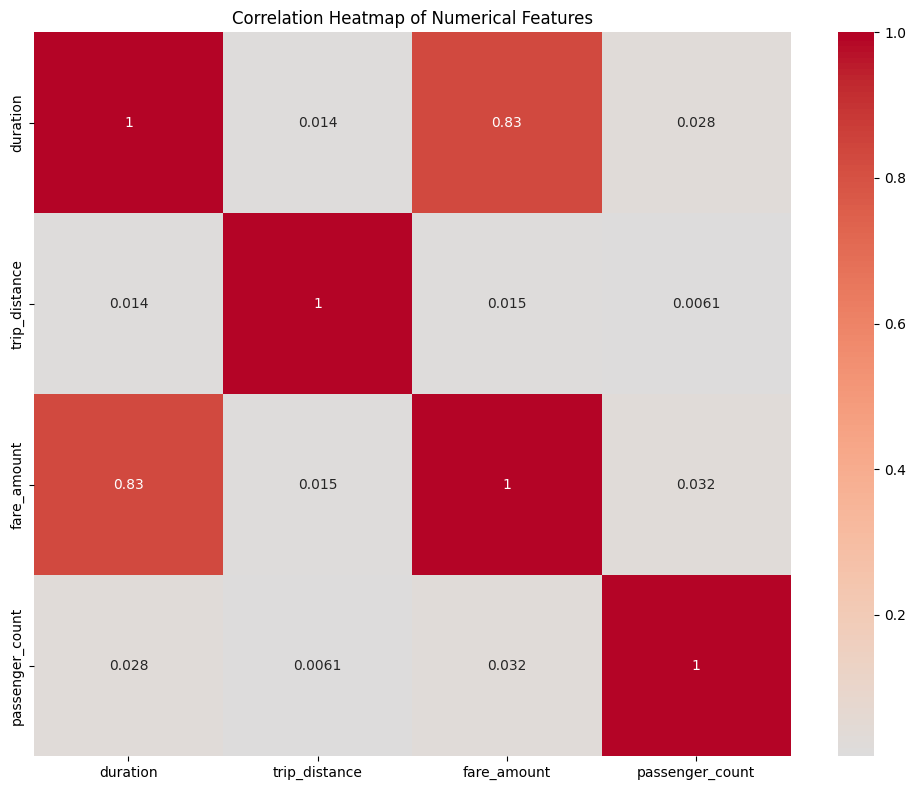

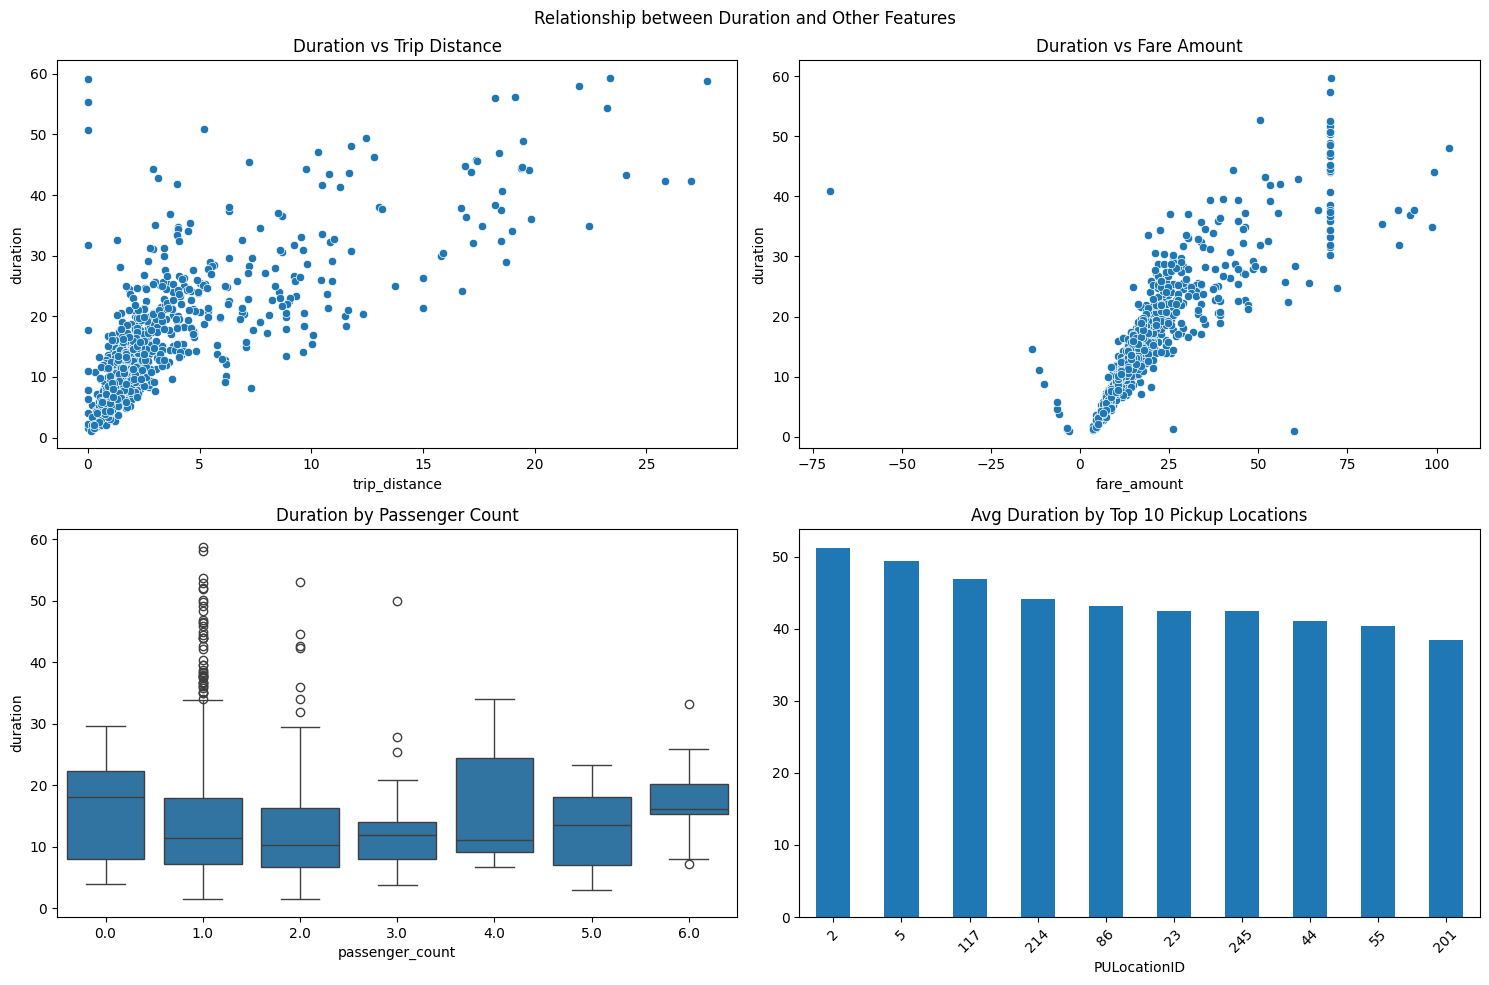

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic statistics of numerical columns
print("Basic Statistics:")
print(feb_df.describe())

# Correlation analysis
numerical_cols = ['duration', 'trip_distance', 'fare_amount', 'passenger_count']
correlation_matrix = feb_df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

# Scatter plots with key numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Relationship between Duration and Other Features')

sns.scatterplot(data=feb_df.sample(1000), x='trip_distance', y='duration', ax=axes[0, 0])
axes[0, 0].set_title('Duration vs Trip Distance')

sns.scatterplot(data=feb_df.sample(1000), x='fare_amount', y='duration', ax=axes[0, 1])
axes[0, 1].set_title('Duration vs Fare Amount')

sns.boxplot(data=feb_df.sample(1000), x='passenger_count', y='duration', ax=axes[1, 0])
axes[1, 0].set_title('Duration by Passenger Count')

# Average duration by location
location_duration = feb_df.groupby('PULocationID')['duration'].mean().sort_values(ascending=False)
location_duration.head(10).plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Avg Duration by Top 10 Pickup Locations')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Analysis of Graphs for Trip Duration Prediction

## 1. Correlation Heatmap
The correlation heatmap shows relationships between numerical features:
- Duration has a strong positive correlation (0.83) with fare_amount
- Trip distance and passenger count show very weak correlations with duration
- This suggests fare_amount could be a useful predictor, while trip_distance and passenger_count may not contribute much to the model

## 2. Duration vs Trip Distance Scatter Plot
- Shows a somewhat linear relationship between trip distance and duration
- High variance in the relationship - similar distances can have very different durations
- Presence of outliers where short distances take long times (likely traffic/wait times)
- Linear regression may capture the general trend but miss local patterns

## 3. Duration vs Fare Amount Scatter Plot
- Strong linear relationship between fare and duration
- Less variance compared to distance plot
- This validates the high correlation seen in the heatmap
- Good candidate for linear regression prediction

## 4. Duration by Passenger Count Box Plot
- Shows distribution of trip durations for different passenger counts
- Median duration relatively consistent across passenger counts
- Large number of outliers in each category
- Suggests passenger count may not be a strong predictor

## 5. Average Duration by Pickup Location
- Shows systematic differences in trip duration based on pickup location
- Some locations consistently have longer average trips
- Location features (encoded through DictVectorizer) should help the model account for these geographic patterns

## 6. Predicted vs Actual Duration Distributions
The density plots compare model predictions to actual values:
- Similar overall shapes indicate the model captures general patterns
- Smoother prediction distribution suggests model generalizes/averages patterns
- Right skew in both shows predominance of shorter trips
- Model seems to underpredict some longer duration trips

In [ ]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['duration']

In [93]:
feb_df[categorical] = feb_df[categorical].astype(str)
feb_df = feb_df[(feb_df.duration >= 1) & (feb_df.duration <= 60)]

In [94]:
dv = DictVectorizer()

In [96]:
train_dicts = jan_df[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)


In [97]:
val_dicts = feb_df[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [98]:
target = 'duration'
y_train = jan_df[target].values
y_val = feb_df[target].values

In [99]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [100]:
y_pred = lr.predict(X_val)

In [102]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
rmse

np.float64(7.811812092681157)

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt


/var/folders/40/jk2lwm8160l7zl5ccrtfvn940000gn/T/ipykernel_2811/4124956464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/40/jk2lwm8160l7zl5ccrtfvn940000gn/T/ipykernel_2811/4124956464.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label

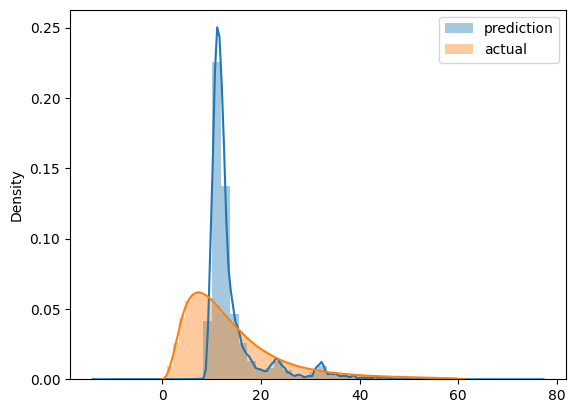

In [104]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')
plt.legend()

The graph shows two distribution plots comparing the predicted trip durations versus actual trip durations:

- Blue line (prediction): Distribution of predicted trip durations from the linear regression model
- Orange line (actual): Distribution of actual trip durations from the training data

Key observations:
1. Both distributions are right-skewed, meaning there are more shorter trips than longer ones
2. The model's predictions follow a similar overall shape to the actual data, suggesting it has captured the general pattern
3. The predicted distribution appears slightly smoother than the actual distribution
4. Most trips fall in the 5-15 minute range, with a peak around 7-8 minutes
5. There are fewer trips with longer durations (>30 minutes) in both distributions

/var/folders/40/jk2lwm8160l7zl5ccrtfvn940000gn/T/ipykernel_2811/3310163081.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction', hist=False)
/var/folders/40/jk2lwm8160l7zl5ccrtfvn940000gn/T/ipykernel_2811/3310163081.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


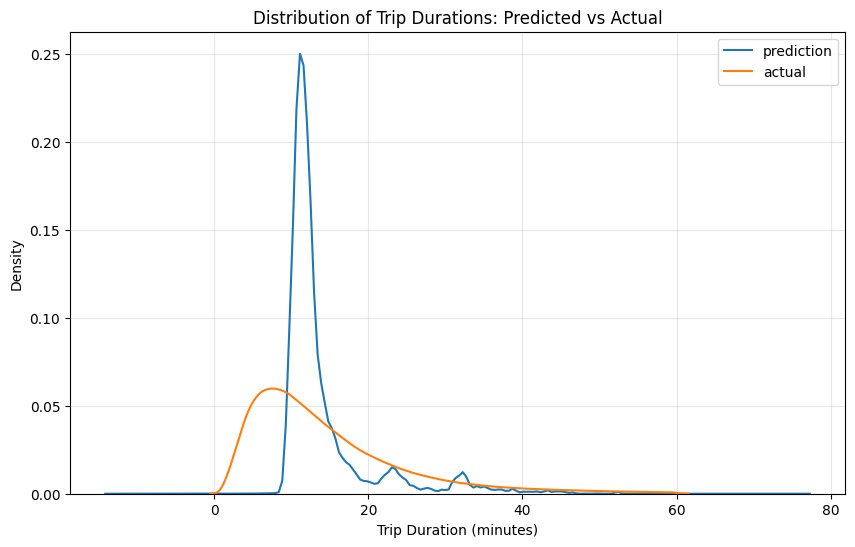

In [105]:
plt.figure(figsize=(10, 6))
sns.distplot(y_pred, label='prediction', hist=False)
sns.distplot(y_val, label='actual', hist=False)
plt.title('Distribution of Trip Durations: Predicted vs Actual')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)


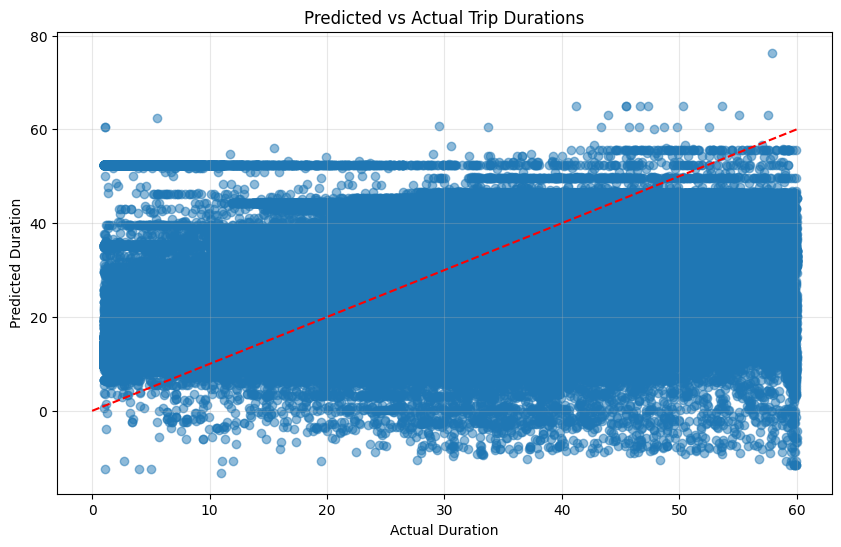

In [108]:
# Additional visualization to show prediction accuracy
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([0, 60], [0, 60], 'r--')
plt.xlabel('Actual Duration')
plt.ylabel('Predicted Duration')
plt.title('Predicted vs Actual Trip Durations')
plt.grid(True, alpha=0.3)
plt.show()

## Prediction Accuracy Plot
The scatter plot of predicted vs actual values shows:
- Points along diagonal line indicate accurate predictions
- Vertical spread shows prediction error at each actual duration
- More points below diagonal at higher durations shows model tends to underpredict longer trips
- Dense cluster of points for trips 5-15 minutes shows model works best for typical trip lengths